# Data Science - Unit 1 Sprint 3

## Sprint Challenge - Linear Algebra

## Welcome to the final Sprint Challenge of Unit 1!

In this challenge, we're going to explore two different datasets where you can demonstrate your skills with fitting linear regression models and practicing some of the linear algebra concepts you learned.

**Make sure to follow the instructions in each task carefully!** The autograded tests are very specific in that they are designed to test on the exact instructions.

Good luck!


## Part A: Linear Regression

### Use the following information to complete Tasks 1 - 11

### Dataset description

The data you will work on for this Sprint Challenge is from the World Happiness Report. The report compiles data from a survey of hundreds of countries and looks at factors such as economic production, social support, life expectancy, freedom, absence of corruption, and generosity to determine a happiness "score".

In this Sprint Challenge, we're only going to look at the report for years 2018 and 2019. We're going to see how much the happiness "score" depends on some of the factors listed above.

For more information about the data, you can look here: [Kaggle: World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness)

### Task 1 - Load the data

* import both `pandas` and `numpy`
* use the URL provided to read in your DataFrame
* load the CSV file as a DataFrame with the name `happy`.
* the shape of your DataFrame should be `(312, 8)`

In [1]:
# Task 1

# URL provided
url = "https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Happy/happiness_years18_19.csv"

# YOUR CODE HERE
import pandas as pd
import numpy as np

happy = pd.read_csv(url)

# Print out the DataFrame
happy.head()
#happy.shape

,Overall_rank,Country_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,NaN
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,NaN
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [3]:
# Task 1 - Test

assert isinstance(happy, pd.DataFrame), 'Have you created a DataFrame named `happy`?'
assert len(happy) == 312


**Task 2** - Explore the data and find NaNs

Now you want to take a look at the dataset, determine the variable types of the columns, identify missing values, and generally better understand your data.

**Your tasks**

* Use describe() to learn about any missing values, the data types, and descriptive statistics for each numeric value
* Determine the total number of null values, assign that value to the variable `num_null`.

In [5]:
# Task 2

# YOUR CODE HERE
num_null = happy.isna().sum().sum()

# Print out your integer result
print("The total number of null values is:", num_null)

The total number of null values is: 226


In [6]:
happy.describe()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,86.00000
mean,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.10900
std,45.104737,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.09613
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,39.750000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.03900
50%,78.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.07900
75%,117.250000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.13725
max,156.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.39300


In [7]:
# Task 2 - Test
import numpy as np
assert isinstance(num_null, np.int64), 'The sum of the NaN values should be an integer.'


**Task 3** - Calculate Nulls

As you may have noticed in the previous task, the column `Perceptions_corruption` has a lot of missing values. What is the percentage of missing values in that column?


* Calculate the percentage of NaN values in `Perceptions_corruption` and assign the result to the variable `corruption_nan`; the value should be a **float** between `0.0` and `100.0`.

In [13]:
# Task 3

# YOUR CODE HERE
corruption_nan = 100 * happy['Perceptions_corruption'].isna().sum() / len(happy)

# Print the percentage of NaN values
print(corruption_nan)


72.43589743589743


In [14]:
# Task 3- Test

assert isinstance(corruption_nan, float), 'The percentage of NaN values should be a float.'
assert corruption_nan >= 1, 'Make sure you calculated the percentage and not the decimal fraction.'


**Task 4 -** Nulls

There are a few different approaches we can take when we have null values in our dataset:
* We can choose to drop the column or null values. (Not always the best approach)
* We can do additional research to find out why those values are missing.
* We can impute the missing values with new values.

For this next task, you will take the third step and impute the missing values in `Perceptions_corrption` with a value
that makes sense to you. Describe your reasoning in the following markdown cell.

In [15]:
# Task 4

# YOUR CODE HERE
happy.fillna(happy['Perceptions_corruption'].mean(), inplace=True)
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_rank             312 non-null    int64  
 1   Country_region           312 non-null    object 
 2   Score                    312 non-null    float64
 3   GDP_per_capita           312 non-null    float64
 4   Social_support           312 non-null    float64
 5   Healthy_life_expectancy  312 non-null    float64
 6   Freedom_life_choices     312 non-null    float64
 7   Generosity               312 non-null    float64
 8   Perceptions_corruption   312 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 22.1+ KB


**Task 4 Written answer:**

Your Answer Here:

I decided to fill in null values with the mean corruption perception. I think this is the most conservative approach, as using a zero value implies very low corruption, which is a rare score only found on the left tail of our distribution.

In [16]:
# Task 4 - Test

assert happy.isna().sum().sum() == 0, "Do you still have null values in 'Perceptions_corruption' column?"
# Hidden tests - you will see the results when you submit to Canvas

##### **Task 5** - Visualize the dataset

Next, we'll create a visualization for this dataset. We know from the introduction that we're trying to predict the happiness score from the other factors. Before we do let, let's visualize the dataset using a seaborn `pairplot` to look at all of the columns plotted as "pairs".

**Your tasks**

* Use the seaborn library `sns.pairplot()` function to create your visualization (use the starter code provided)

This task will not be autograded - but it is part of completing the challenge.

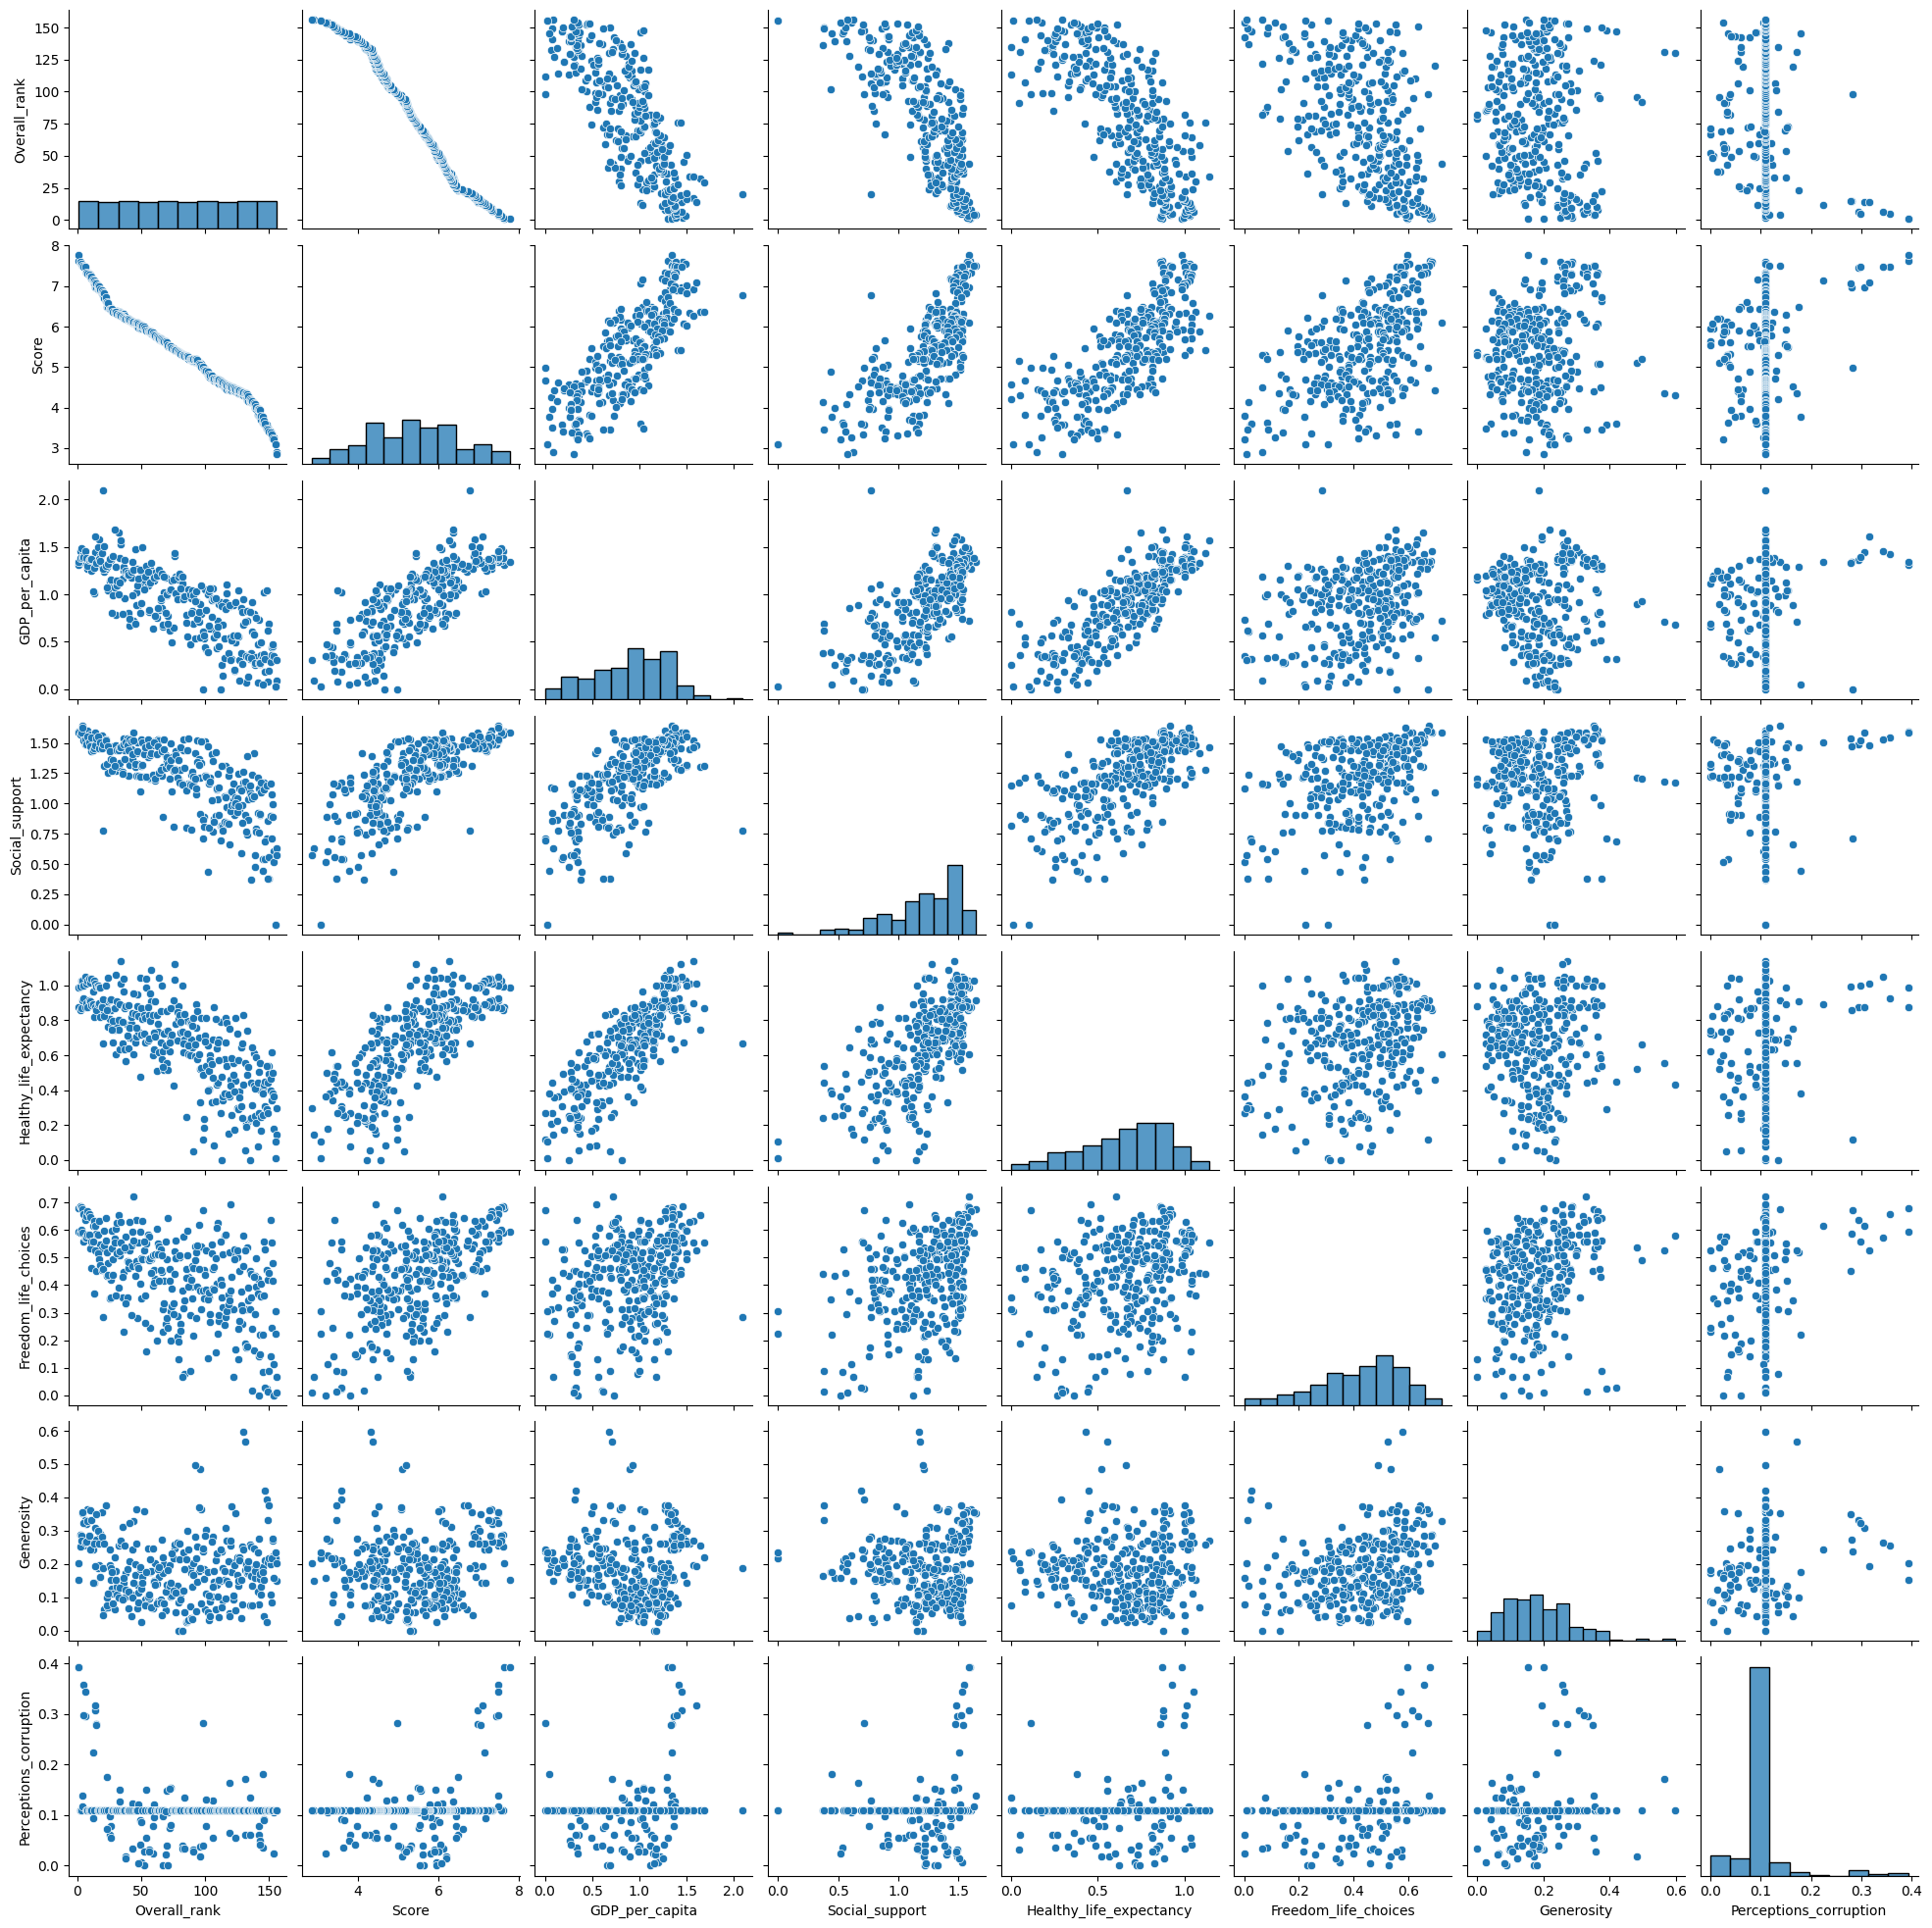

In [19]:
# Task 5

# Import seaborn
import seaborn as sns


# YOUR CODE HERE
sns.pairplot(happy)



**Task 6** - Choose your dependent and independent variables

Before we fit a linear regression to the variables in this data set, we need to determine the dependent variable (the target or y variable) and independent variable (the feature or x variable). For this dataset, we have one dependent variable and a few choices for the independent variable(s). Using the information about the data set and what you know from previous tasks, complete the following:

* Assign the dependent variable to `y_var`
* Choose **one** independent variable and assign it to `x_var`

In [20]:
# Task 6

# YOUR CODE HERE
y_var = happy['Score']
x_var = happy['GDP_per_capita']

**Task 6 Test**

In [ ]:
# Task 6 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 7** - Fit a line using seaborn

Before we fit the linear regression model, we'll check how well a line fits. Because you have some choices for which independent variable to select, we're going to complete the rest of our analysis using `GDP per capita` as the independent variable, and using `Score` as the dependent (target) variable.

**Your tasks:**

* Create a scatter plot using seaborn with `GDP_per_capita` and `Score`
* Use `sns.lmplot()` and Assign this to an object called `seaborn_line`
* Answer the questions about your plot (not autograded).


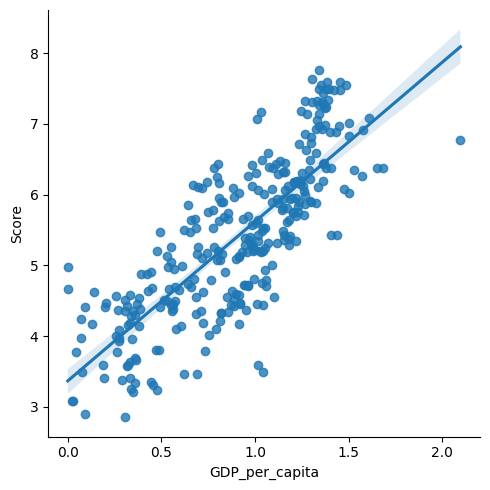

In [21]:
# Task 7
import matplotlib.pyplot as plt
# YOUR CODE HERE
seaborn_line = sns.lmplot(data=happy, x='GDP_per_capita', y='Score')

In [ ]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 7** - Short answer

1. Does it make sense to fit a linear model to these two variables? In other words, are there any problems with this data like extreme outliers, non-linearity, etc.
2. Over what range of your independent variable does the linear model not fit the data well? Over what range does a line fit the data well?


Your Answer Here:

A linear model fits these variables well. There is a clear linear relationship. There are no extreme outliers. There is a noticable gap between the highest GDP samples and the second higest. I would be less comfortable making predictions for GDP_per_capita samples > ~1.6

Happiness is subjective; it's possible that GDP eventually results in diminishing returns on happiness.

**Task 8** - Fit a linear regression model

Now it's time to fit the linear regression model! We have two variables (`GDP_per_capita` and `Score`) that we are going to use in our model.

**Your tasks:**

*  Use the provided import for the `statsmodels.formula.api` library `ols` method
*  Fit a **single variable linear regression model** and assign the model to the variable `model_1`
* Print out the model summary and assign the value of R-squared for this model to `r_square_model_1`. Your value should be defined to three decimal places (example: `r_square_model_1 = 0.123`)


In [22]:
# Task 8

# Import the OLS model from statsmodels
from statsmodels.formula.api import ols

# YOUR CODE HERE
model_1 = ols('Score ~ GDP_per_capita', data=happy).fit()

# Print the model summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     543.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           3.82e-70
Time:                        20:22:13   Log-Likelihood:                -318.08
No. Observations:                 312   AIC:                             640.2
Df Residuals:                     310   BIC:                             647.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3667      0.095     35.

In [23]:
r_square_model_1 = 0.637

In [ ]:
#Task 8 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Interpret your model

Using the model summary you printed out above, answer the following questions.

* Assign the slope of `GDP_per_capita` to the variable `slope_model_1`; define it to two decimal places (example: 1.23). This variable should be a float.
* Assign the p-value for this model parameter to `pval_model_1`.
* Assign the 95% confidence interval to the variables `ci_low` (lower value) and `ci_upper` (upper value); define them to two decimal places.



In [24]:
# Task 9

# YOUR CODE HERE
slope_model_1 = 2.25
pval_model_1 = 0
ci_low, ci_upper = 2.06, 2.44


In [ ]:
# Task 9 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 10** - Fit a multiple predictor linear regression model

For this next task, we'll add in an additional independent or predictor variable. Let's look back at the pairplot and choose another variable - we'll use `Social_support`. Recall from the Guided Projects and Module Projects that we are looking to see if adding the variable `Social_support` is statistically significant after accounting for the `GDP_per_capita` variable.

Fit a linear regression model using two predictor variables: `GDP_per_capita` and `Social_support`.

**Your tasks:**

* Fit a model with both predictor variables and assign the model to `model_2`.
* Print out the model summary and assign the value of R-squared for this model to `r_square_model_2`. Your value should be defined to three decimal places.
* Assign the value of the adjusted R-square to `adj_r_square_model_2`. Your value should be defined to three decimal places.

In [26]:
# Task 10

# YOUR CODE HERE
model_2 = ols('Score ~ GDP_per_capita + Social_support', data=happy).fit()

# Print the model summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     381.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           3.46e-84
Time:                        20:28:17   Log-Likelihood:                -282.03
No. Observations:                 312   AIC:                             570.1
Df Residuals:                     309   BIC:                             581.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3178      0.144     16.

In [27]:
r_square_model_2 = 0.712
adj_r_square_model_2 = 0.710

In [ ]:
# Task 10 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 11** - Making a prediction and calculating the residual

We're going to use our model to make a prediction. Refer to the `happy` DataFrame and find the `GDP_per_capita` score for "Iceland" (index 4).  Then when we have a prediction, we can calculate the residual.  **There are actually two row entries for Iceland, both with slightly different column values. Use the column values that you can see when you print `happy.head()`.**

**Prediction**
* Assign the `GDP_per_capita` value to the variable `x_iceland`; it should be float and defined out to two decimal places.
* Using your slope and intercept values from `model_1`, calculate the `Score` for Iceland (`x_iceland`); assign this value to `predict_iceland` and it should be a float.

**Residual**
* Assign the observed `Score` for Iceland and assign it to the variable `observe_iceland`; it should be float and defined out to two decimal places *(careful with the rounding!)*.
* Determine the residual for the prediction you made and assign it to the variable `residual_iceland` (use your Guided Project or Module Project notebooks if you need a reminder of how to do a residual calculation).

Hint: Define your slope and intercept values out to two decimal places! Your resulting prediction for Iceland should have at least two decimal places. **Make sure to use the parameters from the first model (`model_1`)**.

In [28]:
happy.head()

,Overall_rank,Country_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.109
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.109
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [29]:
model_1.params

Intercept         3.366653
GDP_per_capita    2.254099
dtype: float64

In [30]:
# Task 11

# YOUR CODE HERE
x_iceland = 1.34
predict_iceland = 3.37 + slope_model_1 * x_iceland
observe_iceland = 7.50
residual_iceland = observe_iceland - predict_iceland

# View your prediction
print('Prediction for Iceland :', predict_iceland)
print('Residual for Iceland prediction :', residual_iceland)

Prediction for Iceland : 6.385
Residual for Iceland prediction : 1.1150000000000002


In [31]:
# Task 11 - Test

assert residual_iceland >= 0, 'Check your residual calculation (use observed - predicted).'
assert round(x_iceland, 1) == 1.3, 'Check your Iceland GDP value.'
assert round(observe_iceland, 1) == 7.5, 'Check your Iceland observation value for "Score".'

# Hidden tests - you will see the results when you submit to Canvas

## Part B: Vectors and cosine similarity

In this part of the challenge, we're going to look at how similar two vectors are. Remember, we can calculate the **cosine similarity** between two vectors by using this equation:

$$\cos \theta= \frac{\mathbf {A} \cdot \mathbf {B} }{\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|}$$

$\qquad$

where

* The numerator is the dot product of the vectors $\mathbf {A}$ and $\mathbf {B}$
* The denominator is the norm of $\mathbf {A}$ times the norm of $\mathbf {B}$

### Three documents, two authors

For this task, you will calculate the cosine similarity between three vectors. But here's the interesting part: each vector represents a "chunk" of text from a novel (a few chapters of text). This text was cleaned to remove non-alphanumeric characters and numbers and then each document was transformed into a vector representation as described below.

### Document vectors

In the dataset you are going to load below, each row represents a word that occurs in at least one of the documents. So all the rows are all the words that are in our three documents.

Each column represents a document (doc0, doc1, doc2). Now the fun part: the value in each cell is how frequently that word (row) occurs in that document (term-frequency) divided by how many documents that words appears in (document-frequency).

`cell value = term_frequency / document_frequency`

Use the above information to complete the remaining tasks.

**Task 12** - Explore the text documents

You will be using cosine similarity to compare each document vector to the others. Remember that there are three documents, but two authors. Your task is to use the cosine similarity calculations to determine which two document vectors are most similar (written by the same author).

**Your tasks:**

* Load in the CSV file that contains the document vectors (this is coded for you - just run the cell)
* Look at the DataFrame you just loaded in any way that helps you understand the format, what's included in the data, the shape of the DataFrame, etc.

**You can use document vectors just as they are - you don't need to code anything for Task 12.**

In [32]:
# Imports
import pandas as pd

# Load the data
url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/text_vectors.csv'
text = pd.read_csv(url)
text

,Unnamed: 0,word,doc0,doc1,doc2
0,0,abhorrent,0.000000,0.000000,0.008915
1,1,ability,0.000000,0.021156,0.000000
2,2,abject,0.000000,0.000000,0.008915
3,3,able,0.000000,0.000000,0.017829
4,4,abode,0.000000,0.042313,0.000000
...,...,...,...,...,...
3384,3384,younger,0.000000,0.016090,0.020339
3385,3385,youngest,0.024881,0.000000,0.000000
3386,3386,youth,0.000000,0.032180,0.074577
3387,3387,youthful,0.000000,0.000000,0.008915


**Task 12** - Calculate cosine similarity

* Calculate the cosine similarity for **three pairs of vectors** and assign the results to the following variables (each variable will be a float):

  * assign the cosine similarity of doc0-doc1 to `cosine_doc0_1`
  * assign the cosine similarity of doc0-doc2 to `cosine_doc0_2`
  * assign the cosine similarity of doc1-doc2 to `cosine_doc1_2`

* Print out the results so you can refer to them for the short answer section.
* Answer the questions after you have completed the cosine similarity calculations.

In [34]:
# Task 12

# Use these imports for your cosine calculations (DON'T DELETE)
from numpy import dot
from numpy.linalg import norm

# YOUR CODE HERE
cosine_doc0_1 = dot(text['doc0'], text['doc1']) / (norm(text['doc0']) * norm(text['doc1']))
cosine_doc0_2 = dot(text['doc0'], text['doc2']) / (norm(text['doc0']) * norm(text['doc2']))
cosine_doc1_2 = dot(text['doc1'], text['doc2']) / (norm(text['doc1']) * norm(text['doc2']))

# Print out the results
print('Cosine similarity for doc0-doc1:', cosine_doc0_1)
print('Cosine similarity for doc0-doc2:', cosine_doc0_2)
print('Cosine similarity for doc1-doc2:', cosine_doc1_2)


Cosine similarity for doc0-doc1: 0.1296380132160884
Cosine similarity for doc0-doc2: 0.09904444112880126
Cosine similarity for doc1-doc2: 0.3217125279237164


**Task 12** - Short answer

1. Using your cosine similarity calculations, which two documents are most similar?
2. If doc1 and doc2 were written by the same author, are your cosine similarity calculations consistent with this statement?
3. What process would we need to follow to add an additional document column? In other words, why can't we just stick another column with (term-frequency/document-frequency) values onto our current DataFrame `text`?

This task will not be autograded - but it is part of completing the challenge.



Your Answer Here:

1. doc1 and doc2 are the most similar
2. doc1 and doc2 sharing authorship is consistent with the cosine similarity scores
3. the current text data is in a frequency that is normalized across all the documents. In order to add another text sample (column), we would need to adjust the existing frequencies. For example, if a word that appears in doc3 had only previously appeared in doc0, we would need to divide the frequency value of its' doc0 entry by 2.

In [ ]:
# Task 12 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Additional Information about the texts used in this analysis:**

You can find the raw text [here](https://github.com/LambdaSchool/data-science-practice-datasets/tree/main/unit_4/unit1_nlp). Document 0 (doc0) is chapters 1-3 from "Pride and Predjudice" by Jane Austen. Document 1 (doc1) is chapters 1- 4 from "Frankenstein" by Mary Shelley. Document 2 is also from "Frankenstein", chapters 11-14.